In [1]:

from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("..")
from composite_indicators.aggregation import ClassificationAggregator

%load_ext autoreload
%autoreload 2

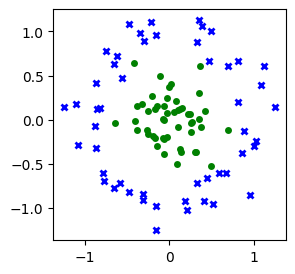

In [2]:
X, y = make_circles(n_samples=100, noise=0.15, factor=0.3, random_state=42)

plt.figure(figsize=(3, 3))
plt.plot(*X[y == 0].T, 'bx', markersize=4,  markeredgewidth=2)
plt.plot(*X[y == 1].T, 'g.', markersize=4,  markeredgewidth=3)

In [3]:
base_model = SVC(kernel="rbf")
base_model.fit(X, y)
accuracy_score(y, base_model.predict(X))

0.95

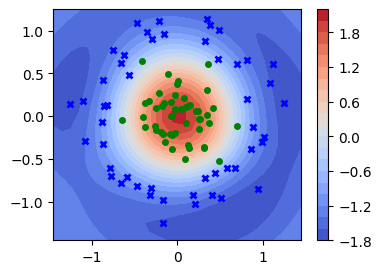

In [4]:
xx, yy = np.meshgrid(
    np.arange(X[:, 0].min() - 0.2, X[:, 0].max() + 0.2, 0.1),
    np.arange(X[:,1].min() - 0.2, X[:, 1].max() + 0.2, 0.1)
)
X_meshgrid = np.c_[xx.ravel(), yy.ravel()]

pred_mesh = base_model.decision_function(X_meshgrid)

plt.figure(figsize=(4, 3))
plt.contourf(xx, yy, pred_mesh.reshape(xx.shape), 20, cmap=plt.cm.coolwarm) # , cmap='RdGy'
plt.colorbar()

plt.plot(*X[y == 0].T, 'bx', markersize=4,  markeredgewidth=2)
plt.plot(*X[y == 1].T, 'g.', markersize=4,  markeredgewidth=3)

0.95


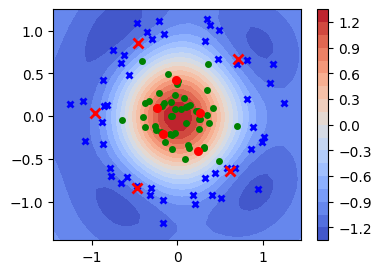

In [5]:
local_model = KMeans(5, n_init=10)
agg_model = ClassificationAggregator(local_model=local_model)
svm_model = SVC(kernel="rbf")

X_agg, y_agg = agg_model.fit_transform(X, y)

svm_model.fit(X_agg, y_agg)

print(accuracy_score(y, svm_model.predict(X)))

pred_mesh = svm_model.decision_function(X_meshgrid)

plt.figure(figsize=(4, 3))
plt.contourf(xx, yy, pred_mesh.reshape(xx.shape), 20, cmap=plt.cm.coolwarm)  # , cmap='RdGy'
plt.colorbar()

plt.plot(*X[y == 0].T, 'bx', markersize=4,  markeredgewidth=2)
plt.plot(*X[y == 1].T, 'g.', markersize=4,  markeredgewidth=3)

plt.plot(*X_agg[y_agg.flatten() == 0].T, 'rx', markersize=7,  markeredgewidth=2)
plt.plot(*X_agg[y_agg.flatten() == 1].T, 'r.', markersize=7,  markeredgewidth=3)

plt.show()
